# Investment Value

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [34]:
# Set current amount of shares data
shares_data = {
    'shares': [200, 320]
}

# Set the tickers
tickers = ['MSFT', 'AAPL']

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
MSFT,200
AAPL,320


In [35]:
# Load .env environment variables
load_dotenv('../../../../../../classkeys.env')

True

In [36]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [37]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [38]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [47]:
today_date = pd.datetime.today().strftime("%m%d%y")

C:\Users\jeffr\AppData\Local\Temp/ipykernel_16536/4162902938.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today_date = pd.datetime.today().strftime("%m%d%y")


In [48]:
# Format current date as ISO format
#today = pd.Timestamp('2021-10-21', tz='America/New_York').isoformat()
today = pd.Timestamp(today_date, tz='America/New_York').isoformat()

In [49]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = '1D'

In [50]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AAPL                                     MSFT  \
                             open    high     low   close    volume   open   
time                                                                         
2021-10-21 00:00:00-04:00  148.76  149.64  147.87  149.46  54957790  307.1   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-21 00:00:00-04:00  311.02  306.36  310.75  13898987

## Calculate the current value in dollars of the stock portfolio

In [42]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio['MSFT']['close'])
aapl_price = float(df_portfolio['AAPL']['close'])

In [43]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * df_shares.loc['MSFT']['shares']
aapl_value = aapl_price * df_shares.loc['AAPL']['shares']

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['MSFT']['shares']} MSFT shares is ${msft_value:0.2f}")
#print(f"The current value of the {df_shares.loc['MSFT']['shares']} MSFT shares is ${msft_value:0.2f}")
print(f"The current value of the {df_shares.loc['AAPL']['shares']} AAPL shares is ${aapl_value:0.2f}")

The current value of the 200 MSFT shares is $62150.00
The current value of the 320 AAPL shares is $47827.20


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [44]:
# Set the data for the shares value DataFrame
value_data = {
    'MSFT': [msft_value],
    'AAPL': [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,62150.0,47827.2


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

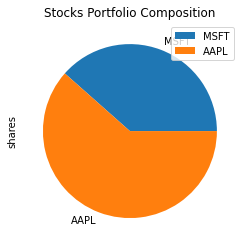

In [45]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value of Stocks in Portfolio'}>

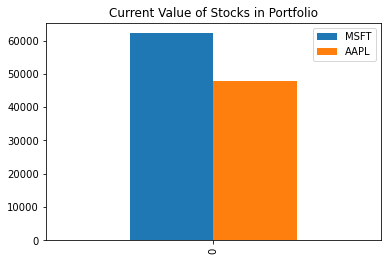

In [46]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value of Stocks in Portfolio")